# Welcome to Consumer Compass - Navigating the World of Social Media Insights

Consumer Compass is an innovative tool designed to decipher the dynamic landscape of social media. Our project utilizes cutting-edge technologies in Natural Language Processing (NLP) and Computer Vision to analyze a vast array of social media data, ranging from textual content like comments and hashtags to visual elements in images and videos.

## Test Data From Insta

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [8]:
def parse_csv_line(line):
    return line.split(';')  # Adjust based on your CSV structure

data = []

with open('/content/drive/MyDrive/ConsumerCompassData/data.csv', 'r', encoding='utf-8') as file:
    for line in file:
        parsed_line = parse_csv_line(line.strip())
        if len(parsed_line) == 4:  # Assuming there should be 4 fields per line
            data.append(parsed_line)

# Create DataFrame from parsed data
df = pd.DataFrame(data, columns=['img_name', 'text', 'hashtag', 'company'])
df.drop(index=0, inplace=True)
df

,img_name,text,hashtag,company
1,post_macbook_0.jpg,他の投稿はこちら ⇢ @simple_suna こんばんは、すなおです！ ⁡いつもいいね...,macbook,apple
2,post_macbook_1.jpg,I hope you're having a great week so far🌇❤️ #...,macbook,apple
3,post_macbook_2.jpg,Bir hayırlı olsun alırıımm🩷 . . . #unboxing #m...,macbook,apple
4,post_macbook_3.jpg,👇MacBookユーザー必見！ 今日はか〜なり久しぶりの MacBookに関する投稿です！...,macbook,apple
5,post_macbook_4.jpg,Friday cozy setup with moody lighting. 🖤👌🏼 Tel...,macbook,apple
...,...,...,...,...
451,post_mercedesformula_23.jpg,#mercedesformula #allestimentomultimediale #le...,mercedesformula,mercedes
452,post_mercedesformula_24.jpg,"Photo by Ahmed Ramadan on September 08, 2019.",mercedesformula,mercedes
453,post_mercedesformula_25.jpg,Photo by Davide Marangon in Milano Navigli Dar...,mercedesformula,mercedes
454,post_mercedesformula_26.jpg,Photo by Federico Ascari in Milano Navigli Dar...,mercedesformula,mercedes


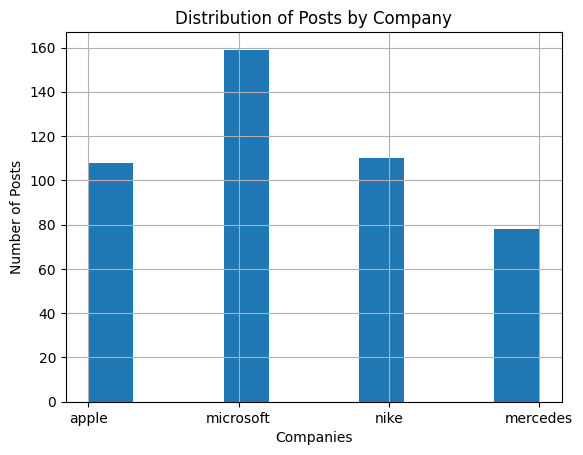

In [9]:
df['company'].hist()
plt.xlabel('Companies')
plt.ylabel('Number of Posts')
plt.title('Distribution of Posts by Company');

In [10]:
# from PIL import Image
# import os

# # Directory where your images are stored
# image_directory = '/content/drive/MyDrive/ConsumerCompassData'  # Update as needed

# for index, row in df.iterrows():
#     img_path = os.path.join(image_directory, row['img_name'])
#     with Image.open(img_path) as img:
#         # Resize the image
#         img_resized = img.resize((227, 227))

#         # Save the resized image
#         # You can choose to overwrite the original image or save as a new file
#         img_resized.save(img_path)  # Overwrites the original image
#         # For saving as a new file, give a new path in save()

## Train Data From Flickr

In [11]:
import requests
import os

def save_images_from_flickr(api_key, query, num_images, dataset_directory):
    # Создание папки, если она не существует
    if not os.path.exists(dataset_directory):
        os.makedirs(dataset_directory)
        print(f"Created directory: {dataset_directory}")

    url = "https://api.flickr.com/services/rest/"
    params = {
        "method": "flickr.photos.search",
        "api_key": api_key,
        "text": query,
        "format": "json",
        "nojsoncallback": 1,
        "per_page": num_images
    }

    response = requests.get(url, params=params)
    response.raise_for_status()

    photos = response.json()["photos"]["photo"]
    # print("Photos found:", len(photos))

    for i, photo in enumerate(photos):
        photo_url = f"https://live.staticflickr.com/{photo['server']}/{photo['id']}_{photo['secret']}.jpg"
        # print("Downloading:", photo_url)

        img_response = requests.get(photo_url)
        img_response.raise_for_status()

        with open(os.path.join(dataset_directory, f"image_{i}.jpg"), "wb") as file:
            file.write(img_response.content)
            # print(f"Saved image_{i}.jpg")

In [12]:
labels = ['healthy', 'unhealthy', 'glamorous', 'drab', 'rugged', 'gentle', 'fun', 'dull']

api_key = "6c5f4e8afdb73883214c9b9471629b81"
num_images = 200
for query in labels:
    dataset_directory = "/content/data/" + str(query)
    save_images_from_flickr(api_key, query, num_images, dataset_directory)

Created directory: /content/data/healthy
Created directory: /content/data/unhealthy
Created directory: /content/data/glamorous
Created directory: /content/data/drab
Created directory: /content/data/rugged
Created directory: /content/data/gentle
Created directory: /content/data/fun
Created directory: /content/data/dull


In [13]:
# import cv2
# import numpy as np
# import os

# def preprocess_image(img_path, target_size=(227, 227)):
#     """
#     Функция для предварительной обработки одного изображения.

#     :param img_path: Путь к изображению.
#     :param target_size: Целевой размер изображения (ширина, высота).
#     :return: Предобработанное изображение.
#     """
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, target_size)
#     img = img.astype('float32') / 255.0
#     return img

# def preprocess_images_from_folders(folders, target_size=(227, 227)):
#     """
#     Функция для предварительной обработки всех изображений из списка папок.

#     :param folders: Список папок с изображениями.
#     :param target_size: Целевой размер изображений.
#     :return: Словарь с предобработанными изображениями, ключами являются метки.
#     """
#     preprocessed_images = {}

#     for folder in folders:
#         label = os.path.basename(folder)
#         preprocessed_images[label] = []

#         for img_file in os.listdir(folder):
#             img_path = os.path.join(folder, img_file)
#             if os.path.isfile(img_path):
#                 preprocessed_images[label].append(preprocess_image(img_path, target_size))

#     return preprocessed_images

# # Список папок с изображениями
# folders = ['/content/data/' + i for i in labels]


# # Предварительная обработка изображений
# preprocessed_images = preprocess_images_from_folders(folders)

# # Пример проверки
# for label, images in preprocessed_images.items():
#     print(f"Label: {label}, Number of Images: {len(images)}")


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

# Define the model
model = Sequential()

# Convolution 1
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', input_shape=(227, 227, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Convolution 2
model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Convolution 3
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# Convolution 4
model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))

# Convolution 5
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output
model.add(Flatten())

# FC6 Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# FC7 Layer
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# FC8 Layer
model.add(Dense(8))  # Replace NUM_CLASSES with the actual number of classes
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Set up ImageDataGenerator for testing (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/data/',  # Main directory for training data
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/data/',  # Main directory for validation data
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    '/content/data/',  # Main directory for testing data
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle testing data
)

Found 1280 images belonging to 8 classes.
Found 319 images belonging to 8 classes.
Found 1599 images belonging to 8 classes.


In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,  # Set the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
40/40 [==============================] - 278s 7s/step - loss: 4.2140 - accuracy: 0.1227 - val_loss: 2.0798 - val_accuracy: 0.1250
Epoch 2/10
40/40 [==============================] - 273s 7s/step - loss: 2.0814 - accuracy: 0.1203 - val_loss: 2.0795 - val_accuracy: 0.1215
Epoch 3/10
40/40 [==============================] - 270s 7s/step - loss: 2.0813 - accuracy: 0.1109 - val_loss: 2.0795 - val_accuracy: 0.1285
Epoch 4/10
40/40 [==============================] - 271s 7s/step - loss: 2.0802 - accuracy: 0.1219 - val_loss: 2.0798 - val_accuracy: 0.1250
Epoch 5/10
40/40 [==============================] - 270s 7s/step - loss: 2.0798 - accuracy: 0.1289 - val_loss: 2.0797 - val_accuracy: 0.1146
Epoch 6/10
40/40 [==============================] - 274s 7s/step - loss: 2.0800 - accuracy: 0.1211 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 7/10
40/40 [==============================] - 274s 7s/step - loss: 2.0804 - accuracy: 0.1242 - val_loss: 2.0796 - val_accuracy: 0.1146
Epoch 8/10
40